In [36]:
from bloom import BloomFilter, CustomBloomFilterHashFunctions
from benchmark_bloom import generate_random_dna_sequences, generate_random_words, benchmark_false_positive_rate, random_string
import matplotlib.pyplot as plt

Hash Function 1: Chi2 = 3.47, p-value = 0.94
Hash Function 2: Chi2 = 4.94, p-value = 0.84
Hash Function 3: Chi2 = 3.51, p-value = 0.94
Hash Function 4: Chi2 = 2.03, p-value = 0.99
Hash Function 5: Chi2 = 4.62, p-value = 0.87
Hash Function 6: Chi2 = 4.01, p-value = 0.91
Hash Function 7: Chi2 = 2.61, p-value = 0.98
Hash Function 8: Chi2 = 3.49, p-value = 0.94
Hash Function 9: Chi2 = 1.24, p-value = 1.00
Hash Function 10: Chi2 = 5.15, p-value = 0.82


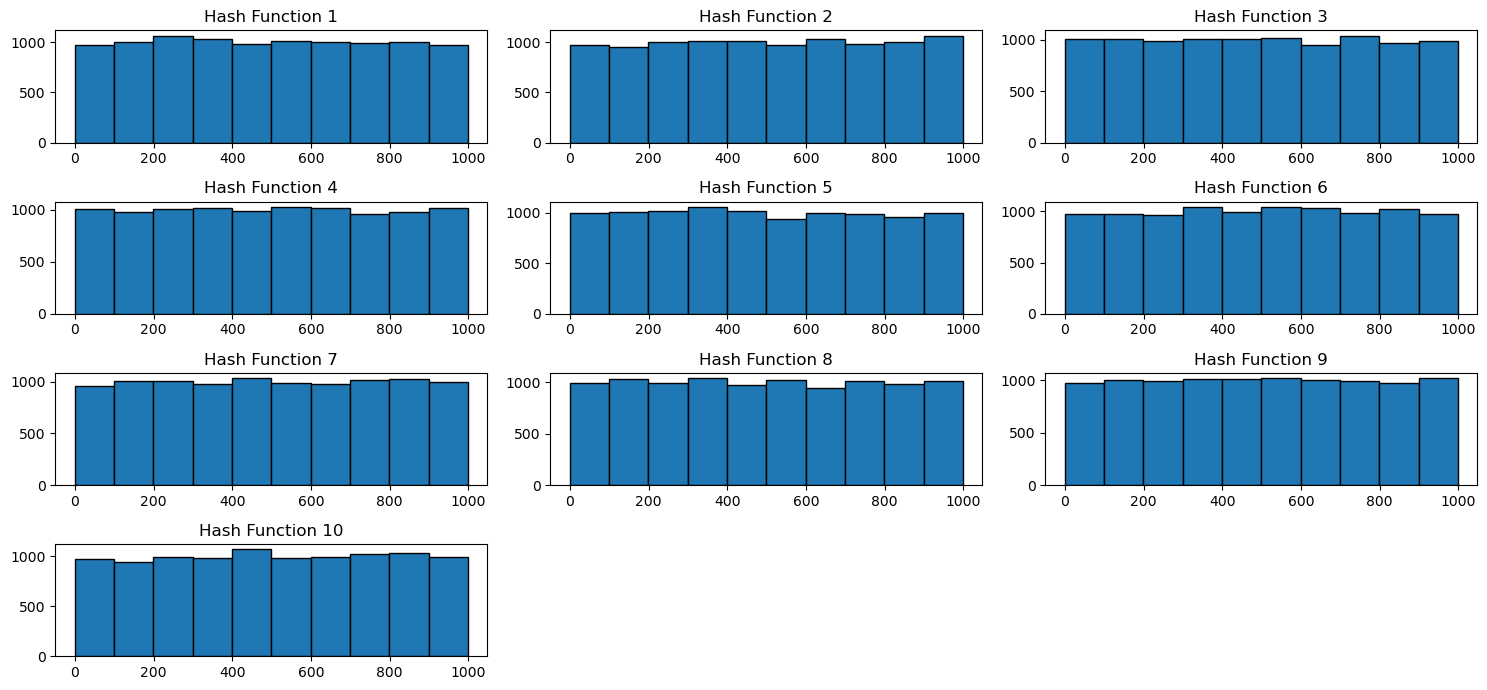

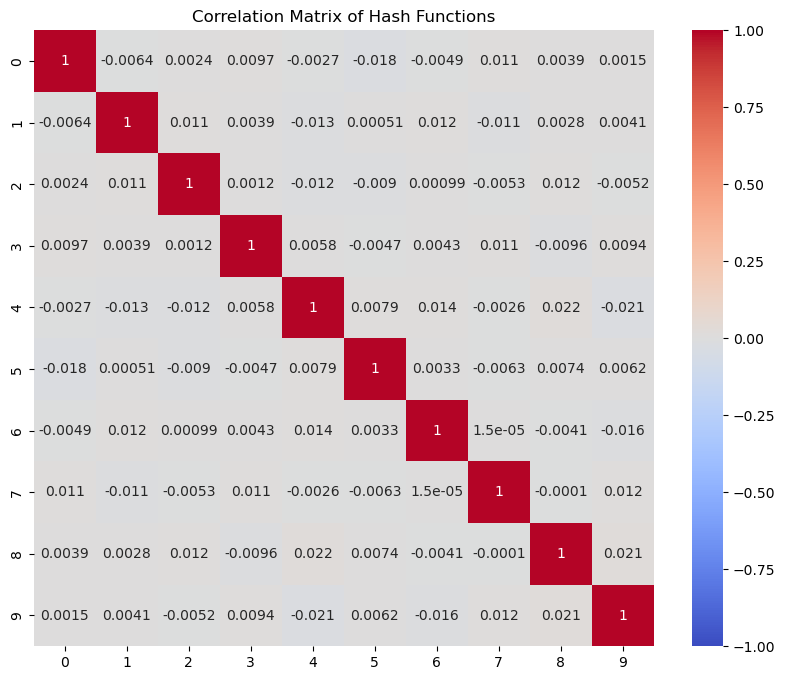

In [41]:
## Evaluate Uniformity of hash functions

bf_size = 1000

num_hashes = 10

# generate random string
random_data = [random_string() for _ in range(10000)]

hashes = CustomBloomFilterHashFunctions(bf_size, num_hashes)



hashes.check_uniformity_with_chisquare(random_data)


In [47]:
# Test bloom filter with DNA data
dna_data = generate_random_dna_sequences(10, 10)
look_up_data = generate_random_dna_sequences(30, 10)

bloom_filter = BloomFilter(100, 5)

for seq in dna_data:
    bloom_filter.add(seq)

for seq in look_up_data:
    if bloom_filter.check(seq):
        print(f'{seq} possible in filter with false positive rate of about {bloom_filter.calculate_false_positive_rate() * 100: .4f}%')
    else:
        print(f'{seq} definitely not in bloom filter')

TGAAGTTTCT definitely not in bloom filter
GTCGAATCTC definitely not in bloom filter
ATCATTGAGC definitely not in bloom filter
CGGCCAACAA definitely not in bloom filter
TACCTCTGGG definitely not in bloom filter
TTCGTCGTCA definitely not in bloom filter
CAACGCTACA definitely not in bloom filter
TAATGAATAC definitely not in bloom filter
GGCTATCACA definitely not in bloom filter
ACGCGCCTAG definitely not in bloom filter
GCGCCGCAAA definitely not in bloom filter
GGCGCGAATT definitely not in bloom filter
TAATCCGAAC definitely not in bloom filter
TTCAGTAAGC definitely not in bloom filter
GTGGTCTCGT definitely not in bloom filter
ACGTCTAGTT definitely not in bloom filter
TCTGAGATGG definitely not in bloom filter
CAAGTACACC definitely not in bloom filter
TAGTGGCTAG definitely not in bloom filter
GGCCTGCACG definitely not in bloom filter
AGATCGCTTG definitely not in bloom filter
TCACACTCTG definitely not in bloom filter
GTGCTGGCTG definitely not in bloom filter
AGTAGTATGC definitely not in bloom

In [52]:
# Test bloom filter with natural words
word_list = generate_random_words(20)
look_up_data = generate_random_words(20)

# word_list
bloom_filter = BloomFilter(1000, 5)
for word in word_list:
    bloom_filter.add(word)

for word in look_up_data:
    if bloom_filter.check(word):
        print(f'{word} possible in filter with false positive rate of about {bloom_filter.calculate_false_positive_rate() * 100:.4f}%')
    else:
        print(f'{word} definitely not in bloom filter')

kind definitely not in bloom filter
appear definitely not in bloom filter
the definitely not in bloom filter
middle definitely not in bloom filter
your definitely not in bloom filter
step definitely not in bloom filter
true definitely not in bloom filter
center definitely not in bloom filter
test definitely not in bloom filter
first definitely not in bloom filter
try definitely not in bloom filter
forward possible in filter with false positive rate of about 0.0008%
always definitely not in bloom filter
west definitely not in bloom filter
knowledge definitely not in bloom filter
far definitely not in bloom filter
social definitely not in bloom filter
court definitely not in bloom filter
traditional definitely not in bloom filter
hot definitely not in bloom filter


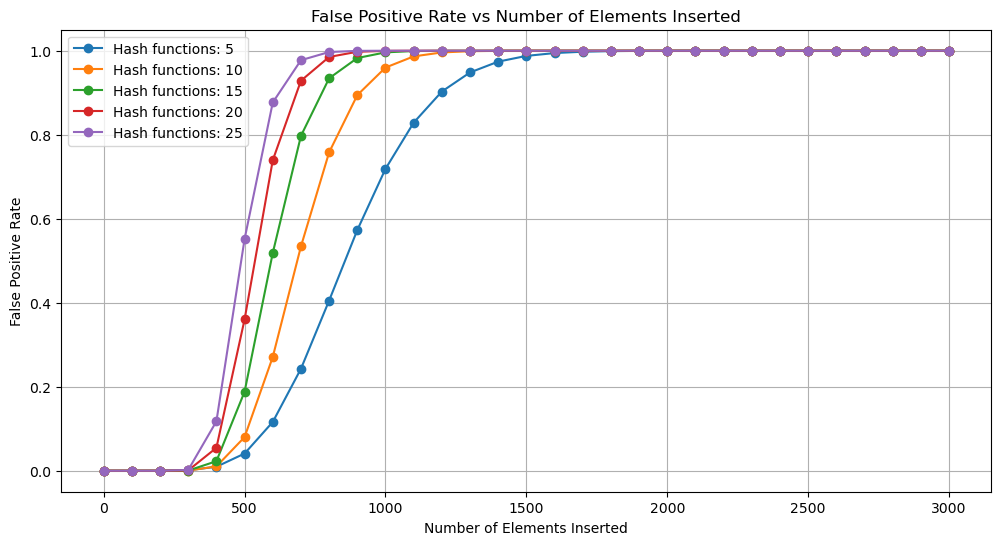

In [53]:

def benchmark_false_positive_rate(expected_n, max_n, step, hash_funcs_list, word_list):
    results = []

    word_list_extended = word_list * (max_n // len(word_list) + 1)

    for num_hashes in hash_funcs_list:
        bloom_filter = BloomFilter(expected_n * 10, num_hashes)
        current_results = {'num_inserted': [], 'false_positive_rate': [], 'num_hashes': num_hashes}

        for n in range(0, max_n + 1, step):
            insert_data = word_list_extended[:n]

            # Insert elements
            for item in insert_data:
                bloom_filter.add(item)

            # Calculate false positive rate
            false_positive_rate = bloom_filter.calculate_false_positive_rate()

            current_results['num_inserted'].append(n)
            current_results['false_positive_rate'].append(false_positive_rate)

        results.append(current_results)

    return results

def plot_results(results):
    plt.figure(figsize=(12, 6))

    for result in results:
        plt.plot(result['num_inserted'], result['false_positive_rate'], marker='o', label=f"Hash functions: {result['num_hashes']}")

    plt.xlabel('Number of Elements Inserted')
    plt.ylabel('False Positive Rate')
    plt.title('False Positive Rate vs Number of Elements Inserted')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
word_list = generate_random_words(1000)  # Dummy word list
expected_n = 1000
max_n = 3000
step = 100
hash_funcs_list = [5, 10, 15, 20, 25]  # Different numbers of hash functions to test

results = benchmark_false_positive_rate(expected_n, max_n, step, hash_funcs_list, word_list)
plot_results(results)
